In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data =pd.read_csv("housing.csv")

In [22]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
# Data Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
# missing values in total_bedrooms column
data.dropna(inplace=True)

In [25]:
# non numirice variable :ocean_proximity 
data["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
dummies = pd.get_dummies(data.ocean_proximity )
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [27]:
data.drop(['ocean_proximity'],axis=1,inplace=True)

In [28]:
data= pd.concat([data,dummies],axis='columns')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:x

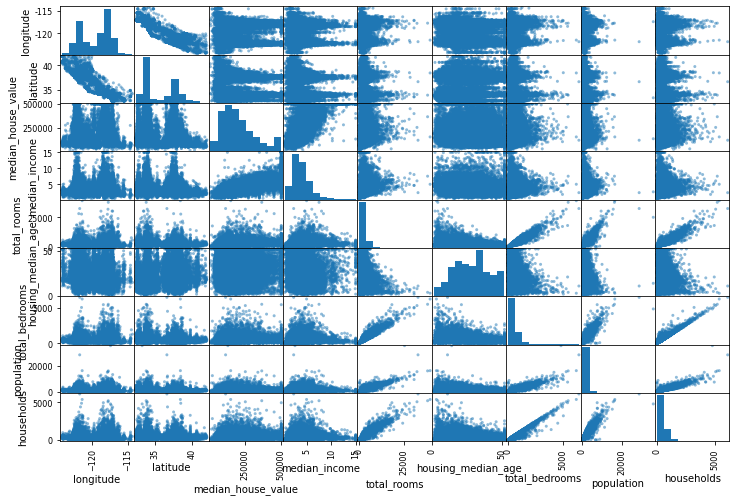

In [41]:
from pandas.plotting import scatter_matrix

attributes = ['longitude','latitude','median_house_value', 'median_income',
             'total_rooms', 'housing_median_age','total_bedrooms','population','households']
scatter_matrix(data[attributes], figsize=(12,8))

In [42]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x = data.drop("median_house_value",axis=1)
y = data['median_house_value']

In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
model.intercept_

-2265004.318716112

In [55]:
model.coef_

array([-2.71087463e+04, -2.56578075e+04,  1.08136421e+03, -6.32214552e+00,
        1.03004042e+02, -3.64097514e+01,  4.31427249e+01,  3.92770830e+04,
       -3.42694434e+04, -7.35096612e+04,  1.79383931e+05, -4.05018603e+04,
       -3.11029663e+04])

In [63]:
prediction = model.predict(x_test)

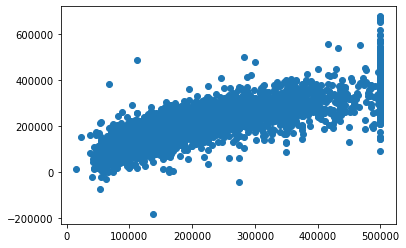

In [64]:
plt.scatter(y_test,prediction)

In [67]:
from sklearn.metrics import mean_squared_error
RMSE_LR = mean_squared_error(y_test, prediction)*0.5
print("RMSE for Linear Regression = ", RMSE_LR)

RMSE for Linear Regression =  2401086769.3020673


In [77]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
alphas = 10 ** np.linspace(10, -2, 100)*0.5 
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(x_train, y_train)
alpha_r = ridgecv.alpha_
print("Optimal Alpha identified for ridge is {}".format(alpha_r))

Optimal Alpha identified for ridge is 0.005


In [78]:
ridge = Ridge(alpha=alpha_r, normalize=True)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
RMSE_RR = mean_squared_error(y_test, pred)*0.5
print("RMSE for Ridge Regression = ", RMSE_RR)

RMSE for Ridge Regression =  2404259668.6369634


In [76]:
import warnings
warnings.filterwarnings(action='ignore')

In [80]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train, y_train)
lasso_score = lassocv.score(x_train, y_train)
lasso_alpha = lassocv.alpha_
print("Lasso score is {} & Lasso alpha is {}".format(lasso_score, lasso_alpha))

Lasso score is 0.6455959060278251 & Lasso alpha is 0.6197462522110542


In [81]:
lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
RMSE_LS = mean_squared_error(y_test, lasso.predict(x_test))
print("RMSE for Lasso Regression = {}".format(RMSE_LS))

RMSE for Lasso Regression = 4803153705.153943


In [83]:
print("RMSE for Linear Regression= {}".format(RMSE_LR))
print("RMSE for Ridge Regression = {}".format(RMSE_RR))
print("RMSE for Lasso Regression = {}".format(RMSE_LS))

RMSE for Linear Regression= 2401086769.3020673
RMSE for Ridge Regression = 2404259668.6369634
RMSE for Lasso Regression = 4803153705.153943


In [86]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
elasticreg=ElasticNet(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

106838.68522038884
R2 Value/Coefficient of determination:0.1653123393245144
